# How to use OP_Map
This notebook will guide you through the capabilities of OP_Map by means of clear examples.

The jupyter notebook extract results from Finite Element Models stored in /data/


------------------
## INITIAL STEPS
### 1.- Open a  new Jupyter Notebook

### 2.- Import Model class from OP-Map library in a Jupyter Notebook

In [24]:
# Import Model class from OP-Map library

from OP_Map import Model

### 3.- Initialize a variable with the Model class, passing in the .op2 file and element-mapping .json file



In [25]:
# Initialize a variable (e.g. M100_model) with the Model class, passing in the .op2 file and
# element-mapping .json file

# NOTE that an excel file with the same name of the .op2 file has been created for storing results there.

M100_model = Model('data/OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.op2', 'data/MECEA-HTP-mapping.json')

Created excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


### 4a.- Read into the initialized variable the values of the element forces for cquad4 and tria3 elements in ELEMENT COORDINATES (default option) with <font color=blue>.r_op2_eforces()</font>  method

In [26]:
# Read into the initialized variable the values of the element forces for cquad4 and tria3 elements

M100_model.r_op2_eforces()

Load cases in the op2 file: 36
Loaded ctria3 and cquad4 element forces in element coordinates from op2 file: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.op2


### 4b.- Alternatively, read into the initialized variable the values of the element forces for cquad4 and tria3 elements in MATERIAL COORDINATES  with <font color=blue>.r_op2_eforces_matcoord()</font>  method

In [27]:
# Read into the initialized variable the values of the element forces for cquad4 and tria3 elements
# in material coordinates

M100_model = Model('data/OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.op2', 'data/MECEA-HTP-mapping.json')

M100_model.r_op2_eforces_matcoord('data/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.bdf')

Created excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


Load cases in the op2 file: 36
Loaded ctria3 and cquad4 element forces in material coordinates from op2 file: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.op2


------------------
## EXTRACTING RESULTS
### List the load cases contained in the .op2 file

In [29]:
# List the load cases contained in the .op2 file
# if excel = True, results will be saved in the excel file created at variable initializatio

M100_model.list_lc(excel = True)

[10004, 10021, 10022, 10023, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 15004, 15021, 15022, 15023, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 17004, 17021, 17022, 17023, 17025, 17026, 17027, 17028, 17029, 17030, 17031, 17032]
Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


### Plot the element-mapping of a specific componente (as defined in the .json file)

Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


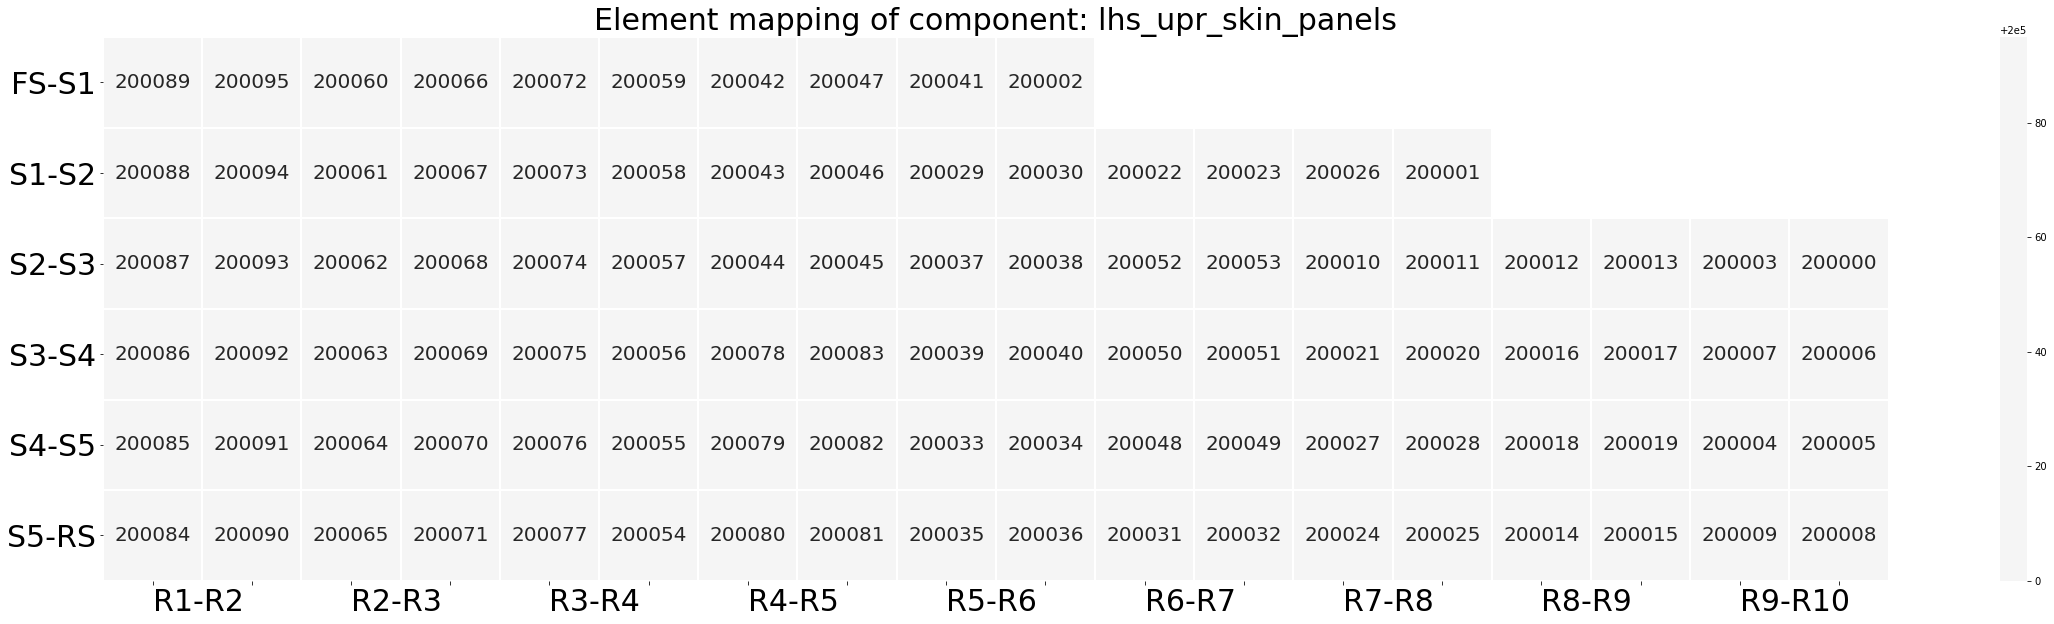

In [7]:
# Plot the element-mapping of a specific componente (as defined in the .json file)
M100_model.plot_component_mapping('lhs_upr_skin_panels', excel = True)

### Plotting mappings of element forces for a component, load case and field value (acc. to order in .op2/.f06 file)

Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


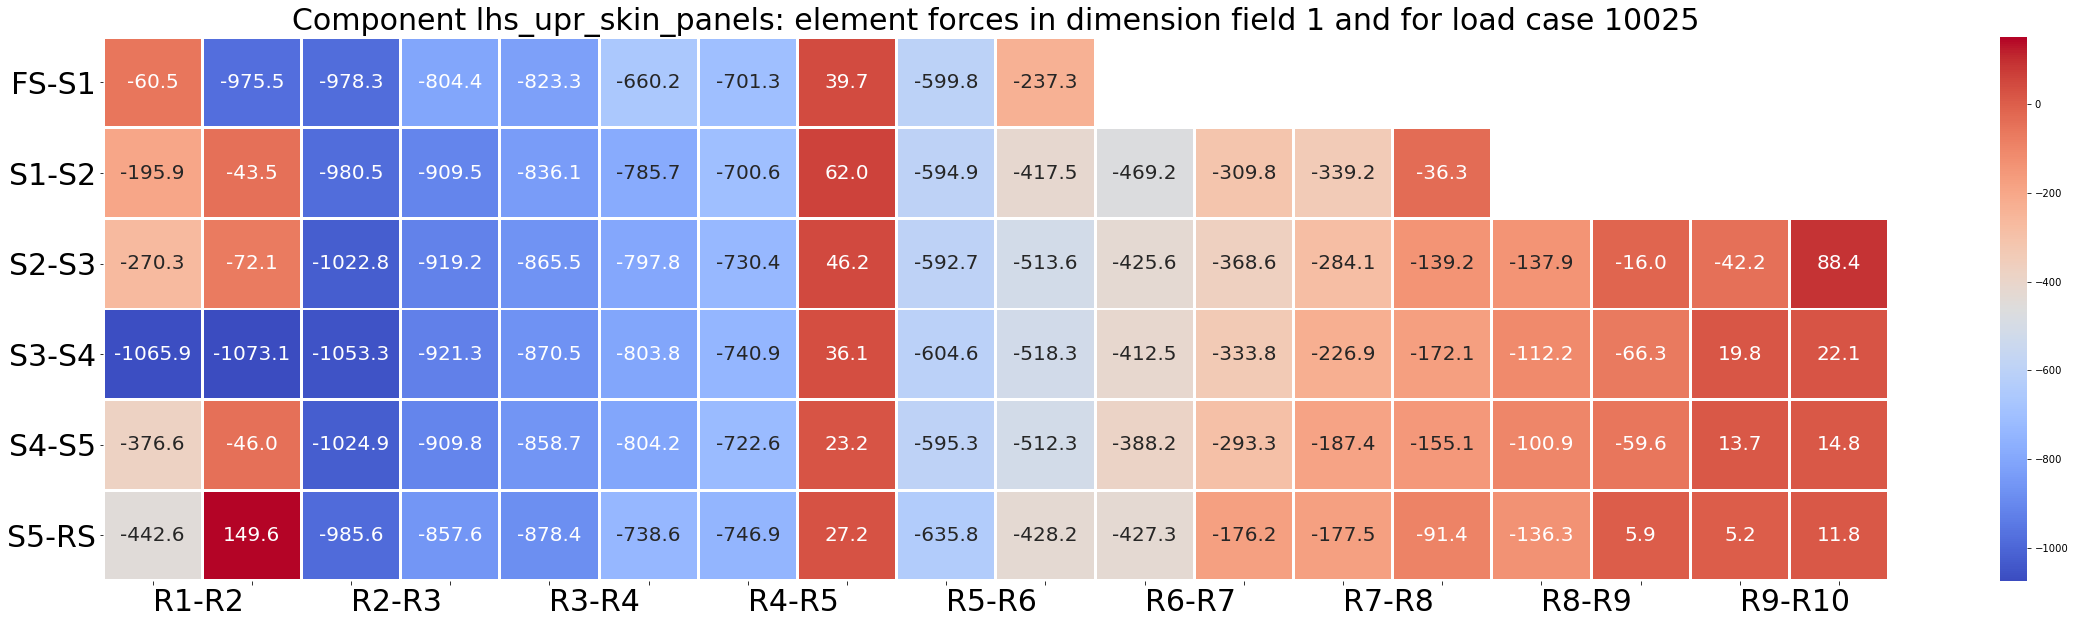

In [8]:
# Plotting mappings of element forces for a component, load case and field value
# Field value components acc. to order in .op2/.f06 file
M100_model.plot_eforces(10025, 'lhs_upr_skin_panels', 1, excel=True)

### Plotting mappings of maximum elemment forces and CLC for a specific component for all load cases in the .op2 file

Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


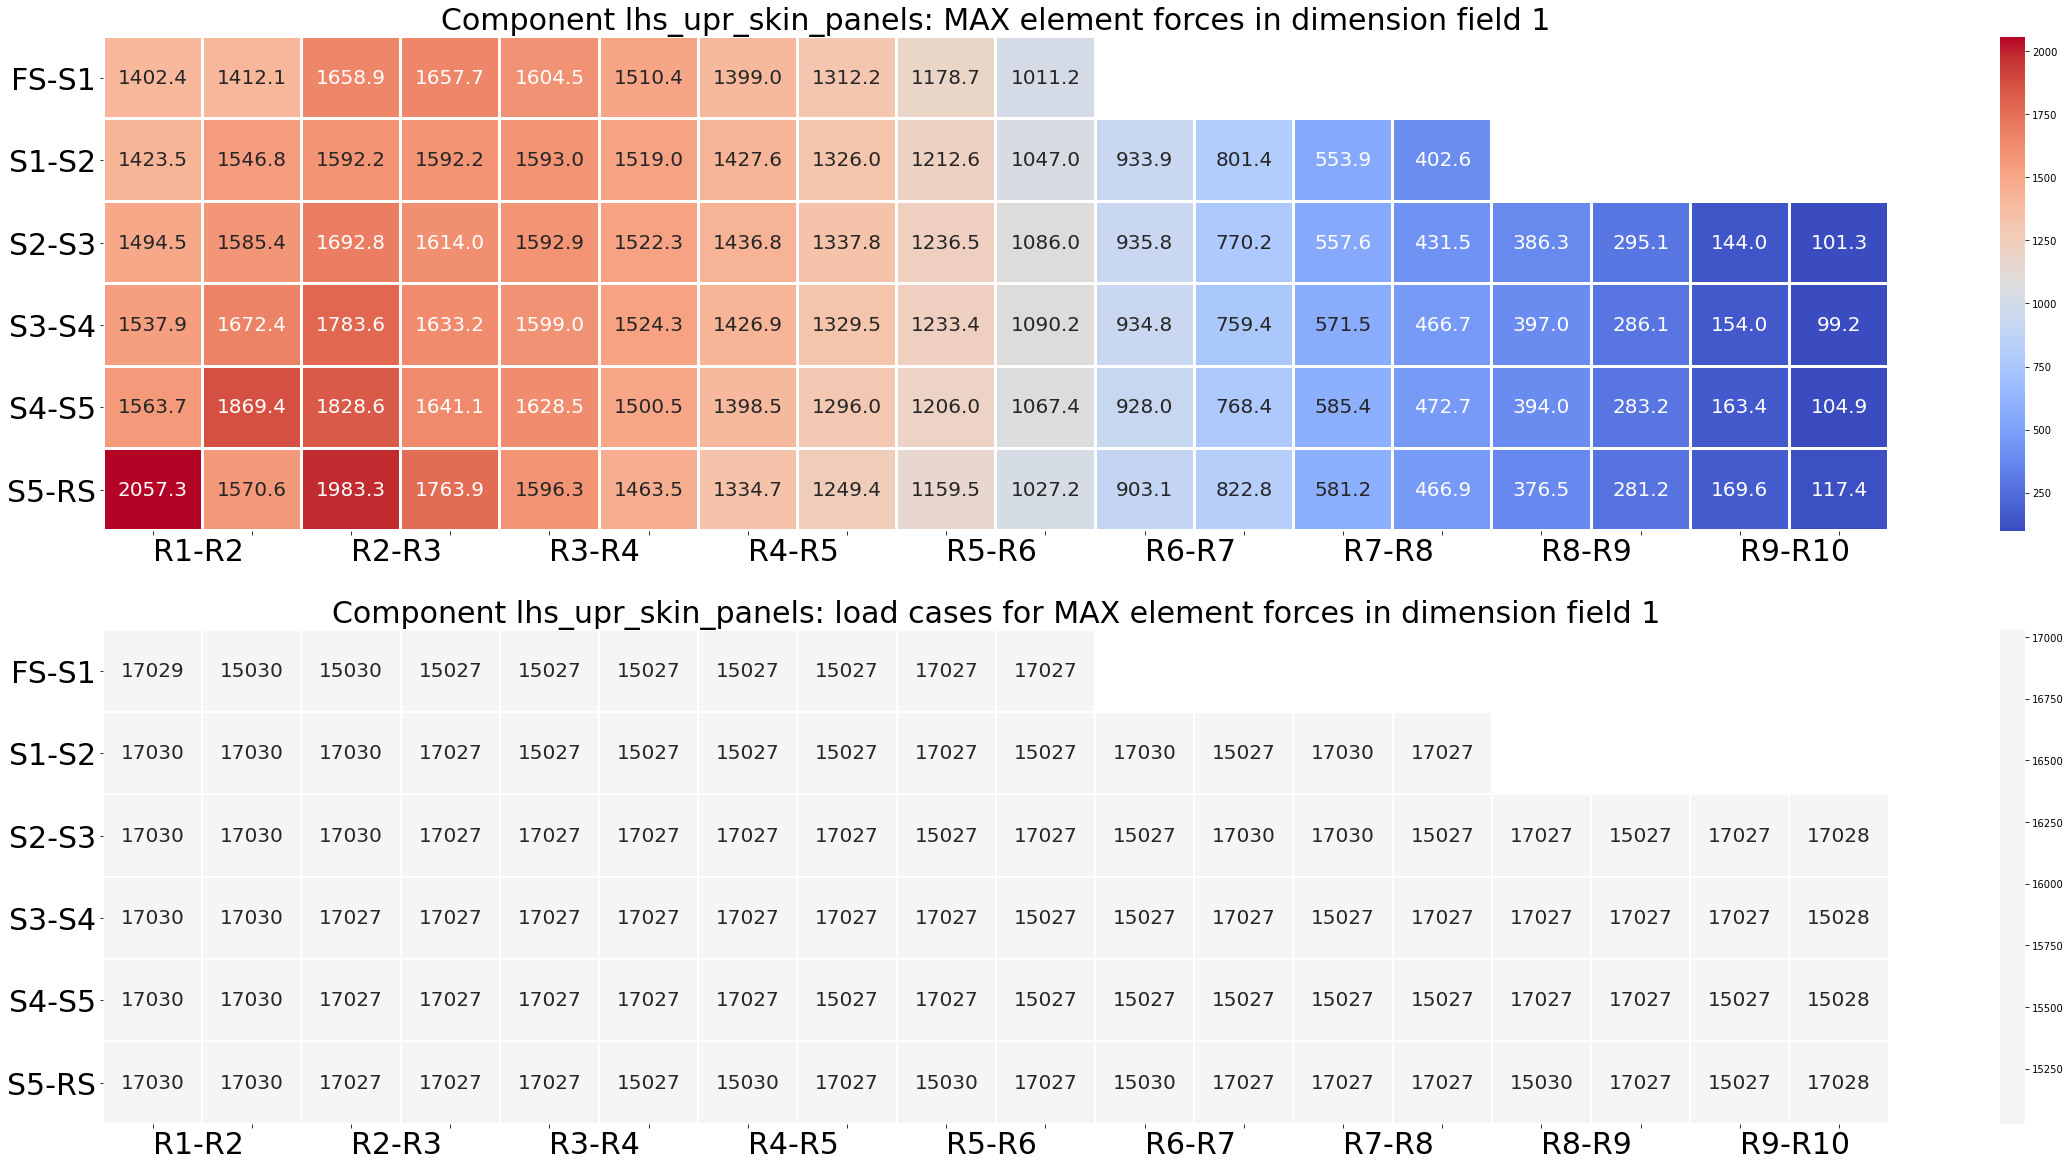

In [30]:
# Plotting mappings of maximum elemment forces and CLC for a specific component for all load cases in the .op2 file
# Field value components acc. to order in .op2/.f06 file

M100_model_mc.plot_env_eforces('lhs_upr_skin_panels', 'MAX', 1, excel=True)